In [215]:
##%pip install fake_useragent
#%pip install requests_html
#%pip install selenium
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import time
from fake_useragent import UserAgent
from requests_html import HTMLSession
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By


In [231]:
salary_rank = pd.read_html('https://www.spotrac.com/nba/rankings/')[0]
salary_rank['Team'] = [i[-4:] for i in salary_rank.Player.values]
salary_rank['Player'] = [i[:-5] for i in salary_rank.Player.values]
salary_rank['cap hit'] = [
    int(s.replace("$", "").replace(",", "")) for s in salary_rank['cap hit'].values
    ]
column_name = ['Player', 'Team',	'Position',	'Age', 'cap hit']
salary_rank = salary_rank[column_name]
salary_rank

,Player,Team,Position,Age,cap hit
0,Stephen Curry,GSW,PG,35,51915615
1,Kevin Durant,PHX,SF,35,47649433
2,Nikola Jokic,DEN,C,28,46900000
3,Joel Embiid,PHI,C,29,46900000
4,LeBron James,LAL,PF,39,46900000
...,...,...,...,...,...
95,Luguentz Dort,OKC,SG,24,15277778
96,Luke Kennard,MEM,SG,27,14763636
97,Kentavious Caldwell-Pope,DEN,SG,30,14704938
98,Jordan Clarkson,UTA,SG,31,14260000


*возьмем значение Cap Hit (определение ниже) у 100 самых высокооплачиваемых игроков NBA*

- ***Position:***
 - **PG** - point guard
 - **SG** - shoooting guard
 - **SF** - small forward
 - **PF** - power forward
 - **C** - central

- ***Cap Hit:*** *a player's cap hit is determined as the average annual value of their current contract. Cap hit is calculated by dividing the total salary plus signing bonuses of a contract by the contract's length.*

In [232]:
white_bitches = ['Nikola Jokic', 'Luka Doncic', 'Gordon Hayward', 'Tyler Herro', 
                 'Fred VanVleet', 'Domantas Sabonis', 'Lauri Markkanen', 'Bojan Bogdanović', 
                 'Jonas Valančiūnas', 'Nikola Vučević', 'Evan Fournier', 'Bogdan Bogdanovic', 
                 'Duncan Robinson', 'Davis Bertans', 'Jusuf Nurkic', 'Kevin Huerter',
                 'Luke Kennard', 'Tyus Jones', 'Doug McDermott', 'Kyle Kuzma',
                 'Steven Adams']

salary_rank['race'] = [1 if i in white_bitches else 0 for i in salary_rank.Player.values]

- *1 - white*
- *0 - black*

In [233]:
salary_rank

,Player,Team,Position,Age,cap hit,race
0,Stephen Curry,GSW,PG,35,51915615,0
1,Kevin Durant,PHX,SF,35,47649433,0
2,Nikola Jokic,DEN,C,28,46900000,1
3,Joel Embiid,PHI,C,29,46900000,0
4,LeBron James,LAL,PF,39,46900000,0
...,...,...,...,...,...,...
95,Luguentz Dort,OKC,SG,24,15277778,0
96,Luke Kennard,MEM,SG,27,14763636,1
97,Kentavious Caldwell-Pope,DEN,SG,30,14704938,0
98,Jordan Clarkson,UTA,SG,31,14260000,0


In [234]:
salary_rank.groupby(['race', 'Position']).agg({'race': ['count'], 'cap hit': ['mean', 'median', 'min', 'max', 'std', 'var']})

race       cap hit                                  \
              count          mean      median       min       max   
race Position                                                       
0    C           11  2.929851e+07  32459438.0  15435000  46900000   
     PF          13  3.221088e+07  32600060.0  17400000  46900000   
     PG          25  2.792193e+07  26346666.0  15596339  51915615   
     SF          15  2.989329e+07  28600000.0  17116279  47649433   
     SG          21  2.706350e+07  23883929.0  14260000  46741590   
1    C            2  3.188750e+07  31887500.0  16875000  46900000   
     PF           3  1.875333e+07  17259999.0  17000000  22000000   
     PG           3  2.562943e+07  22824074.0  14000000  40064220   
     SF           2  2.482700e+07  24827000.0  18154000  31500000   
     SG           5  1.899808e+07  18700000.0  14763636  27000000   

                                           
                        std           var  
race Position                              
0    C         1.117686e+07  1.249222e+14  
     PF        8.870587e+06  7.868732e+13  
     PG        9.903900e+06  9.808723e+13  
     SF        1.075803e+07  1.157352e+14  
     SG        1.096709e+07  1.202771e+14  
1    C         2.123088e+07  4.507503e+14  
     PF        2.814700e+06  7.922535e+12  
     PG        1.325664e+07  1.757384e+14  
     SF        9.437047e+06  8.905786e+13  
     SG        4.825672e+06  2.328711e+13

In [235]:
salary_rank.groupby(['race']).agg({'race': ['count'], 'cap hit': ['mean', 'median', 'min', 'max', 'std', 'var']})

race       cap hit                                                \
     count          mean      median       min       max           std   
race                                                                     
0       85  2.889184e+07  28226880.0  14260000  51915615  1.025112e+07   
1       15  2.277118e+07  18700000.0  14000000  46900000  9.706644e+06   

                    
               var  
race                
0     1.050856e+14  
1     9.421894e+13

In [236]:
fig = px.scatter(salary_rank, y="Age", x="cap hit", color="race",
                hover_data=['race', 'Player'], title='NBA player salary',
                 marginal_x="histogram", marginal_y="rug")
fig.show()

In [237]:
fig = px.bar(salary_rank, x="Age", y="cap hit", color='race',
                hover_data=['race', 'Player'], title='NBA player salary', 
                 facet_row="race", facet_col="Position")
fig.show()

In [238]:
ua = UserAgent()

headers = {'User-Agent': ua.random}
url = 'https://www.spotrac.com/nba/rankings/2023-24/'
response = requests.get(url, headers=headers)
soup = BeautifulSoup(str(response), 'html.parser')

team_stats = soup.find('div', {'class': "ranklist"})

In [239]:
asession = HTMLSession()

r = asession.get('https://www.spotrac.com/nba/rankings/2023-24/')

resp = r.html.raw_html
soup = BeautifulSoup(str(resp), 'html.parser')

team_stats = soup.find('div', {'class': "ranklist"})

In [240]:
df = pd.read_html(str(team_stats))[0]
df['Player'] = [(str(i).replace("\\n", "").replace("\\t", "").strip()) for i in df['Player'].values]
df

,Unnamed: 0,Player,Position,Age,cap hit
0,1.0,Stephen Curry GSW,PG,35,"$51,915,615"
1,2.0,Kevin Durant PHX,SF,35,"$47,649,433"
2,3.0,Nikola Jokic DEN,C,28,"$46,900,000"
3,NaN,Joel Embiid PHI,C,29,"$46,900,000"
4,NaN,LeBron James LAL,PF,39,"$46,900,000"
...,...,...,...,...,...
95,96.0,Luguentz Dort OKC,SG,24,"$15,277,778"
96,97.0,Luke Kennard MEM,SG,27,"$14,763,636"
97,98.0,Kentavious Caldwell-Pope DEN,SG,30,"$14,704,938"
98,99.0,Jordan Clarkson UTA,SG,31,"$14,260,000"


In [3]:
table = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2023.html')

In [6]:
table_3p = table[4]
table_3p

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Sacramento Kings*,82,241.8,43.6,88.2,0.494,13.8,37.3,0.369,...,0.790,9.5,32.9,42.5,27.3,7.0,3.4,13.5,19.7,120.7
1,2.0,Golden State Warriors*,82,241.8,43.1,90.2,0.479,16.6,43.2,0.385,...,0.794,10.5,34.1,44.6,29.8,7.2,3.9,16.3,21.4,118.9
2,3.0,Atlanta Hawks*,82,242.1,44.6,92.4,0.483,10.8,30.5,0.352,...,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4
3,4.0,Boston Celtics*,82,243.7,42.2,88.8,0.475,16.0,42.6,0.377,...,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,117.9
4,5.0,Oklahoma City Thunder*,82,242.1,43.1,92.6,0.465,12.1,34.1,0.356,...,0.809,11.4,32.3,43.6,24.4,8.2,4.2,13.0,21.0,117.5
5,6.0,Los Angeles Lakers*,82,242.4,42.9,89.0,0.482,10.8,31.2,0.346,...,0.775,10.0,35.7,45.7,25.3,6.4,4.6,14.1,17.9,117.2
6,7.0,Utah Jazz,82,241.5,42.5,89.8,0.473,13.3,37.8,0.353,...,0.786,11.8,34.1,45.9,26.0,6.1,5.2,15.4,20.5,117.1
7,8.0,Memphis Grizzlies*,82,241.2,43.7,92.1,0.475,12.0,34.2,0.351,...,0.733,12.0,34.6,46.6,26.0,8.3,5.8,13.6,20.0,116.9
8,9.0,Milwaukee Bucks*,82,241.8,42.7,90.4,0.473,14.8,40.3,0.368,...,0.743,11.1,37.5,48.6,25.8,6.4,4.9,14.6,18.1,116.9
9,10.0,Indiana Pacers,82,240.9,42.0,89.6,0.469,13.6,37.0,0.367,...,0.790,10.1,31.4,41.5,27.0,7.7,5.8,14.9,21.2,116.3


In [124]:
years = [int(i) for i in range(2000, 2024)]
df_00_23 = dict()
for year in years:
    link = f'https://www.basketball-reference.com/leagues/NBA_{year}.html'
    df_00_23.update({year : pd.read_html(link)[4]})
    time.sleep(5)
df_00_23

{2000:       Rk                     Team   G     MP    FG   FGA    FG%   3P   3PA  \
 0    1.0        Sacramento Kings*  82  19805  3276  7288  0.450  534  1656   
 1    2.0         Detroit Pistons*  82  19830  3044  6635  0.459  439  1223   
 2    3.0         Dallas Mavericks  82  19730  3195  7047  0.453  519  1326   
 3    4.0          Indiana Pacers*  82  19730  3047  6640  0.459  583  1487   
 4    5.0         Milwaukee Bucks*  82  19855  3174  6827  0.465  394  1069   
 5    6.0      Los Angeles Lakers*  82  19805  3137  6836  0.459  344  1047   
 6    7.0            Orlando Magic  82  19755  3169  7014  0.452  294   870   
 7    8.0          Houston Rockets  82  19830  3001  6664  0.450  581  1625   
 8    9.0           Boston Celtics  82  19730  3054  6880  0.444  417  1260   
 9   10.0     Seattle SuperSonics*  82  19780  3108  6946  0.447  546  1611   
 10  11.0           Denver Nuggets  82  19855  3057  6911  0.442  470  1397   
 11  12.0            Phoenix Suns*  82  19805 

In [267]:

df_00_23_3pst = dict()
df_00_23[2000][['G','Team','3P', '3PA', '3P%']]
for year in years:
  df_00_23_3pst.update({year : df_00_23[year][['G','Team','3P', '3PA', '3P%']]})
for year in years:   
  if df_00_23_3pst[year]['3P'][0] > 100:
    df_00_23_3pst[year]['3P'] = np.round(df_00_23_3pst[year]['3P'].div(df_00_23_3pst[year]['G'][0]),1)
    df_00_23_3pst[year]['3PA'] = np.round(df_00_23_3pst[year]['3PA'].div(df_00_23_3pst[year]['G'][0]),1)
  
df_00_23_3pst[2020]

<ipython-input-267-c28aee1d653a>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-267-c28aee1d653a>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,G,Team,3P,3PA,3P%
0,73,Milwaukee Bucks,13.8,38.9,0.355
1,72,Houston Rockets,15.6,45.3,0.345
2,75,Dallas Mavericks,15.1,41.3,0.367
3,72,Los Angeles Clippers,12.4,33.5,0.371
4,72,New Orleans Pelicans,13.6,36.9,0.370
5,74,Portland Trail Blazers,12.9,34.1,0.377
6,72,Washington Wizards,12.0,32.6,0.368
7,71,San Antonio Spurs,10.7,28.5,0.376
8,72,Boston Celtics,12.6,34.5,0.364
9,73,Phoenix Suns,11.4,31.8,0.358


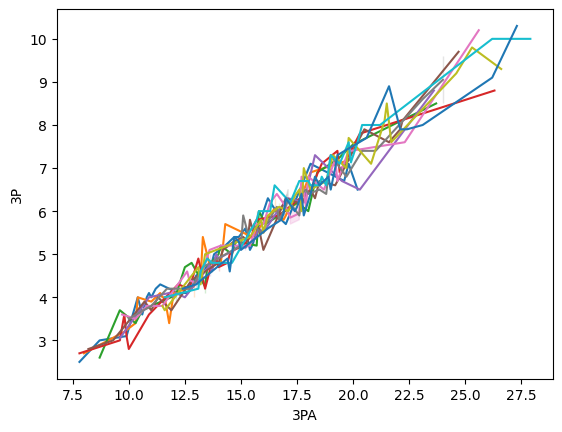

In [226]:
for year in range(2000, 2011):
  sns.lineplot(data = df_00_23_3pst[year], x = '3PA', y = '3P')


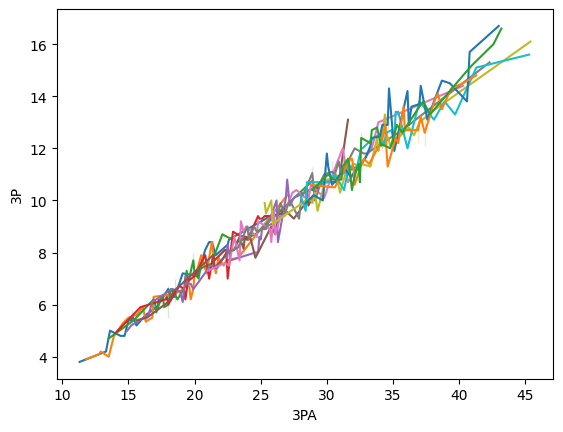

In [230]:
for year in range(2011, 2024):
  sns.lineplot(data = df_00_23_3pst[year], x = '3PA', y = '3P')

<ipython-input-282-e975a7141586>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-282-e975a7141586>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-282-e975a7141586>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-282-e975a7141586>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [360]:
spisok = dict()
a = []
for team in df_00_23[year]['Team']: 
  a = []
  for year in years:
    a.append(df_00_23[year].loc[df_00_23[year]['Team'] == team])
    spisok.update({team : a})

  
#df_00_23[2023].loc[df_00_23[2023]['Team'] == 'Sacramento Kings']
spisok['Atlanta Hawks'][0]

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24,25.0,Atlanta Hawks,82,19830,3000,6807,0.441,258,814,0.317,...,0.743,1146,2570,3716,1548,500,461,1266,1718,7735


[    Rk              Team   G     MP    FG   FGA    FG%    3P   3PA    3P%  \
 0  1.0  Sacramento Kings  82  241.8  43.6  88.2  0.494  13.8  37.3  0.369   
 
    ...   FT%  ORB   DRB   TRB   AST  STL  BLK   TOV    PF    PTS  
 0  ...  0.79  9.5  32.9  42.5  27.3  7.0  3.4  13.5  19.7  120.7  
 
 [1 rows x 25 columns],
     Rk                   Team   G     MP    FG   FGA    FG%    3P   3PA  \
 1  2.0  Golden State Warriors  82  241.8  43.1  90.2  0.479  16.6  43.2   
 
      3P%  ...    FT%   ORB   DRB   TRB   AST  STL  BLK   TOV    PF    PTS  
 1  0.385  ...  0.794  10.5  34.1  44.6  29.8  7.2  3.9  16.3  21.4  118.9  
 
 [1 rows x 25 columns],
     Rk           Team   G     MP    FG   FGA    FG%    3P   3PA    3P%  ...  \
 2  3.0  Atlanta Hawks  82  242.1  44.6  92.4  0.483  10.8  30.5  0.352  ...   
 
      FT%   ORB   DRB   TRB   AST  STL  BLK   TOV    PF    PTS  
 2  0.818  11.2  33.2  44.4  25.0  7.1  4.9  12.9  18.8  118.4  
 
 [1 rows x 25 columns],
     Rk            Team   G 